In [18]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

# https://github.com/BNL-DAQ-LDRD/calotrack_tree/tree/main
# enum detid {
#     mvtxId = 0,
#     inttId = 1,
#     tpcId = 2,
#     tpotId = 3,
#     cemcId = 4,
#     ihcalId = 5,
#     ohcalId = 6,
#     epdId = 7,
#     mbdId = 8
# };

# input hits in calarometer is "nHits_", and in trackers "reco_cluster_"
# groundtruth hits in calarometer is "particle_" and in trackers "truth_cluster_"

In [20]:
data_file = "../macro/testout.root" # sample data shared by Shuhang containing 100 events
with uproot.open(data_file) as fp:
    print(list(fp['T;1'].keys()))
data = uproot.open(data_file)["T;1"]
detid = {"mvtx": 0,"intt": 1,"tpc": 2,"tpot": 3,"cemc": 4,"ihcal": 5,"ohcal": 6,"epd": 7,"mbd": 8 };
id2det = {x:str(x)+'-'+y for y,x in detid.items()}

['nHits', 'Hit_E', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_t', 'Hit_detid', 'nParticles', 'particle_pid', 'particle_energy', 'particle_px', 'particle_py', 'particle_pz', 'particle_vtx_x', 'particle_vtx_y', 'particle_vtx_z', 'particle_track_id', 'particle_primary_id', 'particle_parent_id', 'particle_is_pythia_primary', 'particle_is_embedded', 'particle_charge', 'nRecoClusters', 'reco_cluster_E', 'reco_cluster_x', 'reco_cluster_y', 'reco_cluster_z', 'reco_cluster_t', 'reco_cluster_detid', 'reco_cluster_trcluster_id', 'reco_cluster_g4hit_id', 'reco_cluster_g4hit_trkid', 'nTruthClusters', 'truth_cluster_E', 'truth_cluster_x', 'truth_cluster_y', 'truth_cluster_z', 'truth_cluster_t', 'truth_cluster_detid', 'truth_cluster_id', 'truth_cluster_trparticle_track_id', 'nTrackG4Hits', 'track_g4hit_x', 'track_g4hit_y', 'track_g4hit_z', 'track_g4hit_t', 'track_g4hit_E', 'track_g4hit_trparticle_track_id', 'track_g4hit_id']


In [27]:
## combine all hits and clusters per event
def get_event(event_id):
    calx = data["Hit_x"].array(library="np")[event_id]
    caly = data["Hit_y"].array(library="np")[event_id]
    calz = data["Hit_z"].array(library="np")[event_id]
    calE = data["Hit_E"].array(library="np")[event_id]
    calD = data["Hit_detid"].array(library="np")[event_id]
    trkx = data["reco_cluster_x"].array(library="np")[event_id]
    trky = data["reco_cluster_y"].array(library="np")[event_id]
    trkz = data["reco_cluster_z"].array(library="np")[event_id]
    trkE = data["reco_cluster_E"].array(library="np")[event_id]
    trkD = data["reco_cluster_detid"].array(library="np")[event_id]
    trk_g4hit_trkid = data["reco_cluster_g4hit_trkid"].array(library="np")[event_id]
    x = np.concatenate([trkx])
    y = np.concatenate([trky])
    z = np.concatenate([trkz])
    E = np.concatenate([trkE])
    D = np.concatenate([trkD])
    g4hit_trkid = np.concatenate([trk_g4hit_trkid])
    # x = np.concatenate([trkx, calx])
    # y = np.concatenate([trky, caly])
    # z = np.concatenate([trkz, calz])
    # E = np.concatenate([trkE, calE])
    # D = np.concatenate([trkD, calD])
    df = pd.DataFrame({"x": x, "y": y, "z": z, "E": E, "D": D, "g4hit_trkid": g4hit_trkid})
    df["detector type"] = df["D"].apply(lambda x: id2det[x])
    df = df[(df['g4hit_trkid'] < 100)]
    return df

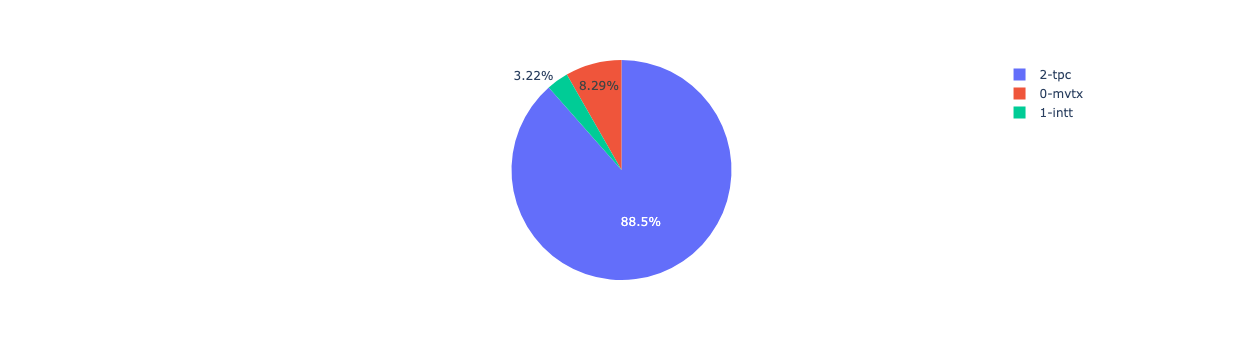

In [29]:
event_id = 0  # pick different events
## Pie Chart of number of "hits" and "clusters" from different detectors
df = get_event(event_id)
tmp = df["detector type"].to_list();
a, b= np.unique(tmp, return_counts=True)
tmp_df = pd.DataFrame({'name': a, 'count': b})
fig = px.pie(tmp_df, values='count', names='name')
fig.update_layout(legend_traceorder="normal")
fig.show()

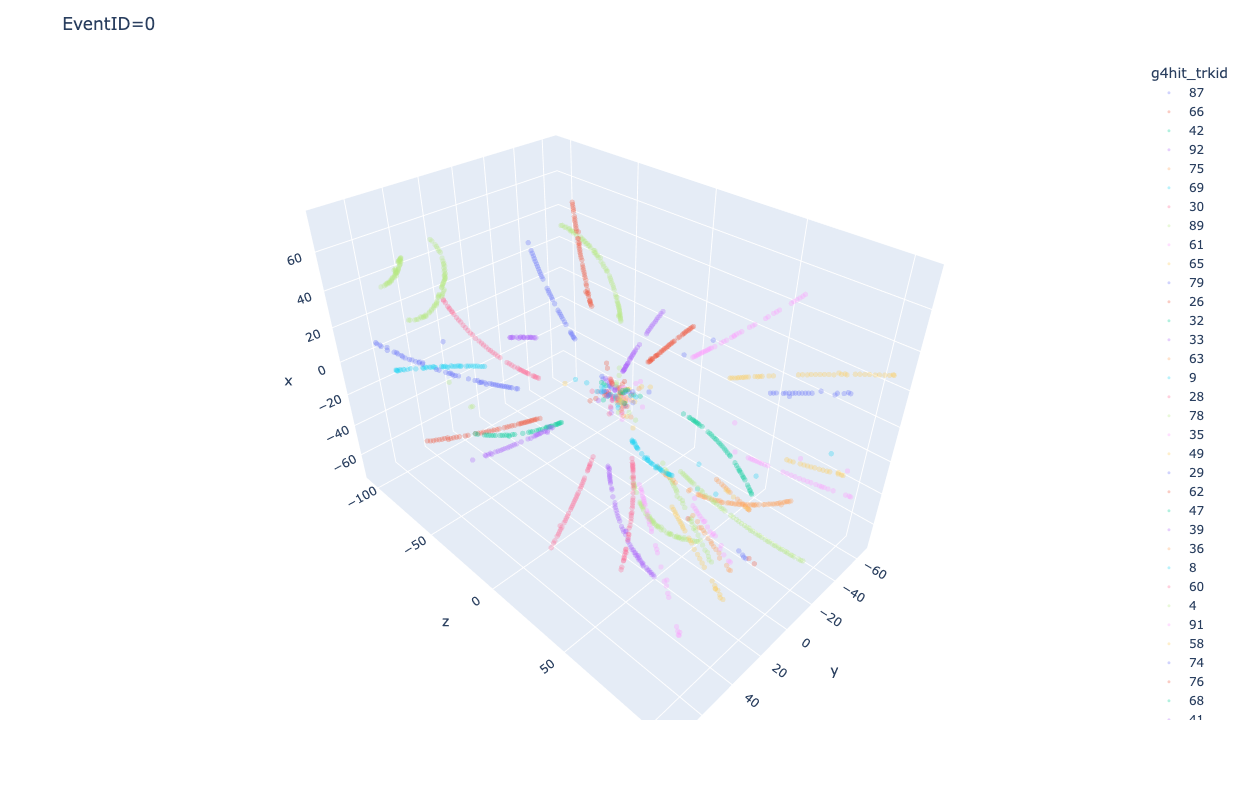

In [30]:
## Interactive 3D Scatter. 
## try: single click or double click the detector type in the legend.

fig = px.scatter_3d(df, x='x', y='y', z='z', color='g4hit_trkid', opacity=0.3)#, symbol='D')
fig.update_traces(marker_size=3)
fig.update_layout(title=f"event {event_id}", width=800, height=800)
camera = dict(
    up=dict(x=1, y=0, z=0),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
)
fig.update_layout(scene_camera=camera, title=f"EventID={event_id}")
fig.update_layout(legend_traceorder="normal")
fig.show()